### This model has been built using XGBoost Regressor.

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [59]:
house_price_data = fetch_california_housing()

In [60]:
house_price_dataframe = pd.DataFrame(house_price_data.data, columns=house_price_data.feature_names)

In [61]:
house_price_dataframe['price'] = house_price_data.target

In [62]:
house_price_dataframe.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [63]:
house_price_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [64]:
correlation = house_price_dataframe.corr()

<Axes: >

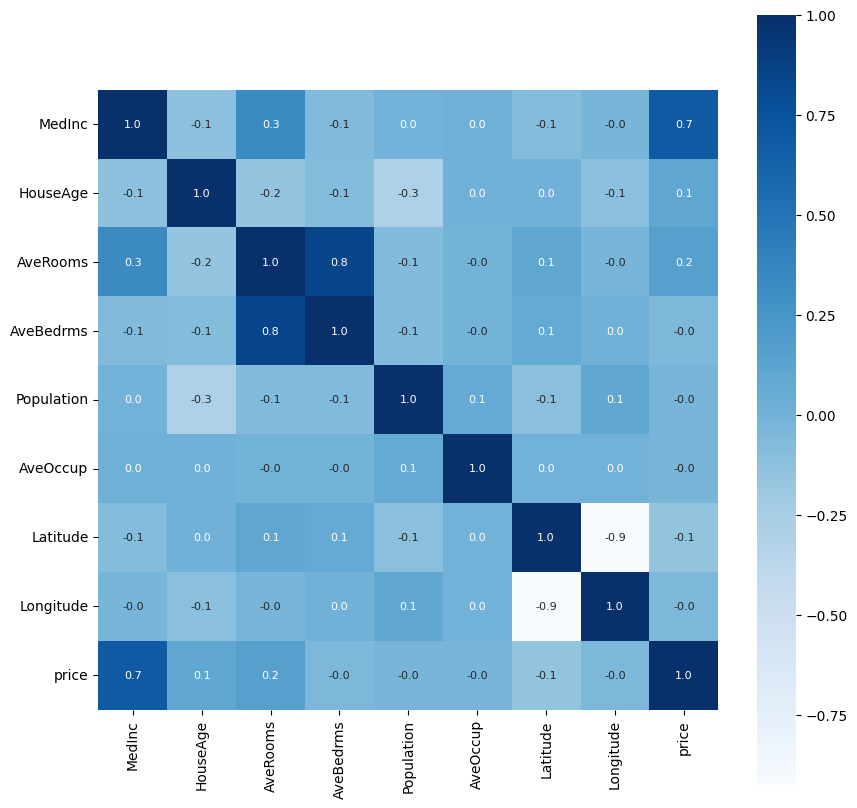

In [65]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')

In [66]:
X = house_price_dataframe.drop(['price'], axis=1)
Y = house_price_dataframe['price']

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [68]:
model = XGBRegressor()

In [69]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [70]:
training_data_prediction = model.predict(X_train)
test_data_prediction = model.predict(X_test)

* R_sq -> R Squared Error
* MSE -> Mean Absolute Error

In [71]:
R_sq_training = metrics.r2_score(Y_train,training_data_prediction)
MSE_training = metrics.mean_absolute_error(Y_train,training_data_prediction)
print("For Training Data:")
print(f"r squared error: {R_sq_training}")
print(f"mean absolute error: {MSE_training}")

For Training Data:
r squared error: 0.943650140819218
mean absolute error: 0.1933648700612105


In [72]:
R_sq_test = metrics.r2_score(Y_test,test_data_prediction)
MSE_test = metrics.mean_absolute_error(Y_test,test_data_prediction)

print("For Test Data:")
print(f"r squared error: {R_sq_test}")
print(f"mean absolute error: {MSE_test}")

For Test Data:
r squared error: 0.8338000331788725
mean absolute error: 0.3108631800268186


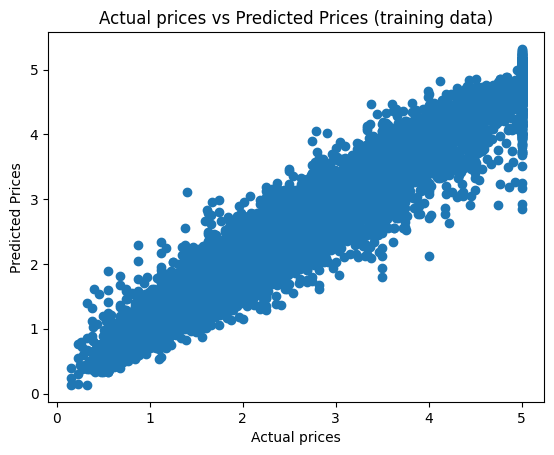

In [73]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual prices")
plt.ylabel("Predicted Prices")
plt.title("Actual prices vs Predicted Prices (training data)")
plt.show()

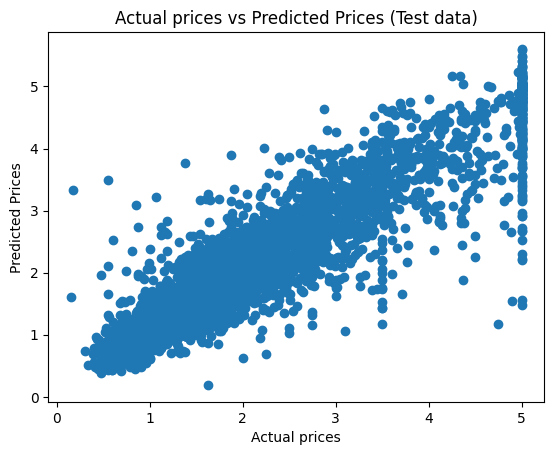

In [74]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual prices")
plt.ylabel("Predicted Prices")
plt.title("Actual prices vs Predicted Prices (Test data)")
plt.show()